In [ ]:
#This code investigates the data set to classify setosa and versicolor species for
#3 features viz. sepal_length,sepal_width,petal_length

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import a function for plotting decision boudaries
#!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [2]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

# We need only setosa and versicolor which are the first 100 rows
df = df.iloc[:100]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [3]:
X = df[["sepal_length", "sepal_width", "petal_length"]].to_numpy()

In [4]:
# Store the labels in y
y = df['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# setosa = -1, versicolor = 1

y = np.where(y == 'setosa', -1, 1)

In [5]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.w3 = np.random.rand(1)
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.w3 = self.w3 - update*xi[2]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2, self.w3])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [6]:
# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

In [7]:
# Predict labels on X
y_pred = my_clf.predict(X)

In [8]:
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
#my_clf.score(X,y)

In [11]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


'plt.rcParams["figure.figsize"] = [7.00, 3.50]\nplt.rcParams["figure.autolayout"] = True\nfig = plt.figure()\nax = fig.add_subplot(111, projection=\'3d\')\ndata = np.random.random(size=(3, 3, 3))\nz, x, y = data.nonzero()\nax.scatter(X, y, clf, clf=z, alpha=1)\nplt.show()'

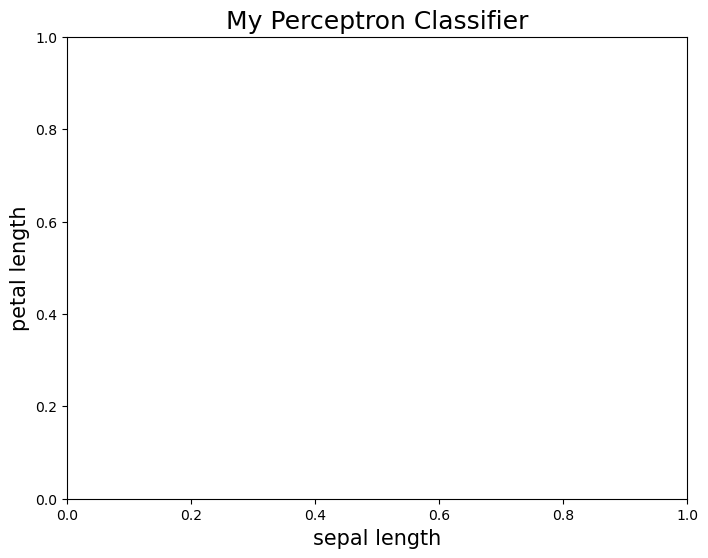

In [12]:
plt.figure(figsize = (8, 6))
#plot_decision_regions(X, y, clf = my_clf)
plt.title("My Perceptron Classifier", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

'''plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = np.random.random(size=(3, 3, 3))
z, x, y = data.nonzero()
ax.scatter(X, y, clf, clf=z, alpha=1)
plt.show()'''

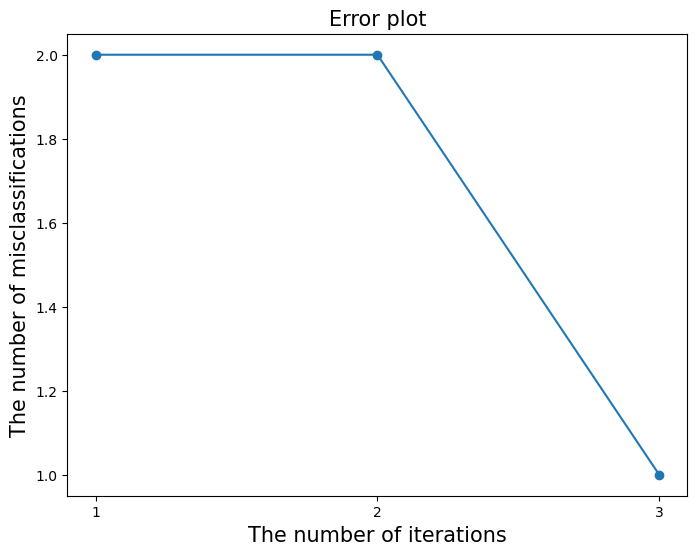

In [13]:
# We plot the errors for each iteration
# We also see the number of iterations needed for the algorithm to find the classifier

plt.figure(figsize = (8, 6))
plt.plot(range(1, len(my_clf.errors)+1), my_clf.errors, 
         marker = "o")
plt.title("Error plot", fontsize = 15)
plt.xlabel("The number of iterations", fontsize = 15)
plt.ylabel("The number of misclassifications", fontsize = 15)
plt.xticks(range(1, len(my_clf.errors)+1))
plt.show()